In [1]:
import pandas as pd
import numpy as np

In [2]:
pwd

'C:\\Users\\ABC\\3. Edureka'

In [17]:
iris = pd.read_csv('C:\\Users\\ABC\\6. Datasets\\iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
iris['species'] = iris['species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
iris[iris['species']==2].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [ ]:
help(iris.species.apply) 

In [28]:
species = {'0':'Iris-setosa', '1':'Iris-versicolor', '2':'Iris-virginica'}
speciesARR = [species[key] for key in species]
speciesARR

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [29]:
iris['species_values'] = iris.species.apply(lambda x: speciesARR[x])

In [34]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_values
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa


In [35]:
from matplotlib import pyplot as plt

In [36]:
%matplotlib inline

In [37]:
iris0 = iris[iris['species']==0]
iris1 = iris[iris['species']==1]
iris2 = iris[iris['species']==2]

In [39]:
iris0.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_values
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa


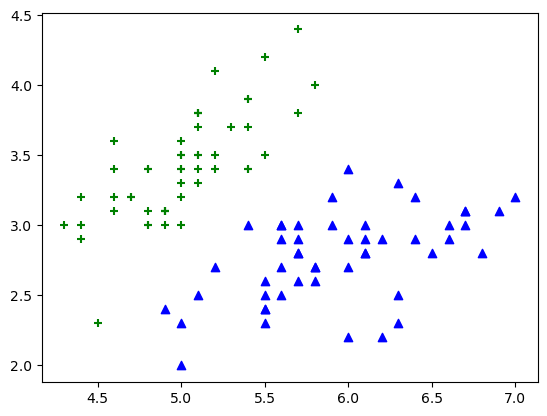

In [48]:
plt.scatter(iris0['sepal_length'], iris0['sepal_width'], color='green', marker='+')
plt.scatter(iris1['sepal_length'], iris1['sepal_width'], color='blue', marker='^')


In [59]:
x = iris.iloc[:, 0:4]
y = iris.iloc[:,5]

In [49]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=1)

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [90]:
knn.score(x_test, y_test)

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9666666666666667

In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'y_pred')

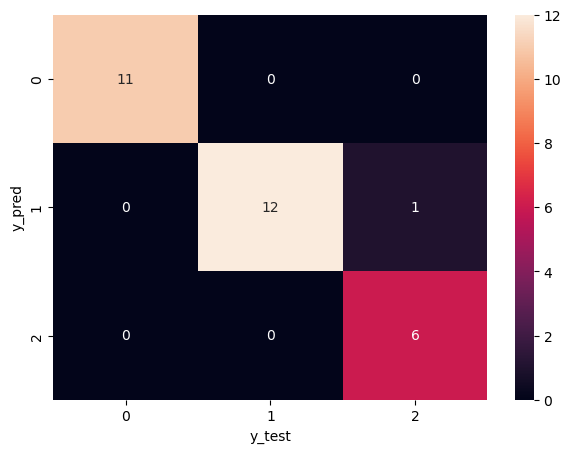

In [93]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [102]:
final = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})
final.sort_values('y_test', ascending=True).head()

,y_test,y_pred
14,Iris-setosa,Iris-setosa
19,Iris-setosa,Iris-setosa
33,Iris-setosa,Iris-setosa
16,Iris-setosa,Iris-setosa
40,Iris-setosa,Iris-setosa


In [ ]:
plt.scatter(iris0['sepal_length'], iris0['sepal_width'], color='green', marker='+')
plt.scatter(iris1['sepal_length'], iris1['sepal_width'], color='blue', marker='^')


In [105]:
final0 = final[final['y_test']=='Iris-setosa']
final1 = final[final['y_pred']=='Iris-setosa']

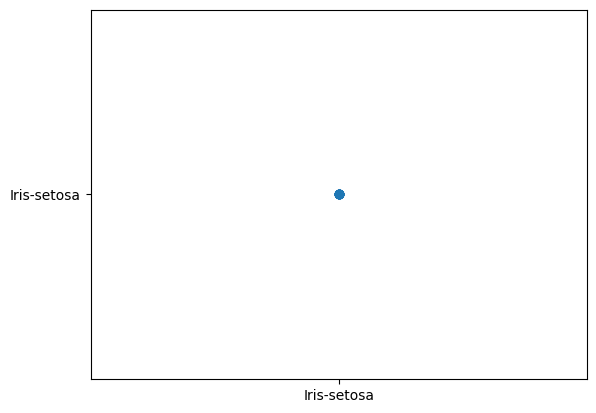

In [107]:
plt.scatter(final0['y_test'], final1['y_pred'])